# Employee Attrition prediction

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### 1. Preparation- 

**1.1 Load data**

In [2]:
attrition_df = pd.read_csv("HR Employee Attrition.csv")
attrition_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**1.2 Conduct preliminary analysis of data**

In [3]:
attrition_df.describe().T.style.background_gradient(cmap = 'YlGnBu')

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,1470.000000,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,1470.000000,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1470.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1470.000000,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,1470.000000,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1470.000000,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,1470.000000,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.000000,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000


## 2. Data Cleaning and Preparation

**1.3 Check missing Value**

In [4]:
attrition_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There is no null values in the dataset.

**2.1 Explore Data**

In [5]:
attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

**2.2 Unique Values**

In [6]:
for col in attrition_df.columns:
    unique_values = attrition_df[col].nunique()
    print('{} -->'.format(col), unique_values)
    print('---------------------')

Age --> 43
---------------------
Attrition --> 2
---------------------
BusinessTravel --> 3
---------------------
DailyRate --> 886
---------------------
Department --> 3
---------------------
DistanceFromHome --> 29
---------------------
Education --> 5
---------------------
EducationField --> 6
---------------------
EmployeeCount --> 1
---------------------
EmployeeNumber --> 1470
---------------------
EnvironmentSatisfaction --> 4
---------------------
Gender --> 2
---------------------
HourlyRate --> 71
---------------------
JobInvolvement --> 4
---------------------
JobLevel --> 5
---------------------
JobRole --> 9
---------------------
JobSatisfaction --> 4
---------------------
MaritalStatus --> 3
---------------------
MonthlyIncome --> 1349
---------------------
MonthlyRate --> 1427
---------------------
NumCompaniesWorked --> 10
---------------------
Over18 --> 1
---------------------
OverTime --> 2
---------------------
PercentSalaryHike --> 15
---------------------
Performa

**3.1 Reomve the columns with one unique value**

In [7]:
# Find columns with only one unique value
unique_values = attrition_df.nunique()
one_value_cols = unique_values[unique_values == 1].index

# Print the column names with only one unique value
print("Columns with only one unique value:")
print(list(one_value_cols))

Columns with only one unique value:
['EmployeeCount', 'Over18', 'StandardHours']


After checking the unique value, EmployeeNumber can be removed.

In [8]:
# Remove three columns
cols_to_remove = ['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber']
attrition_df = attrition_df.drop(columns=cols_to_remove)

**Check numerical and categorical columns.**

In [9]:
# select columns with object data type
object_columns = attrition_df.select_dtypes(include='object').columns

# print column names
print(object_columns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')


In [10]:
numerical_columns = attrition_df.select_dtypes(include='int64').columns
numerical_columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**3.2 Polt the correlation matrix**

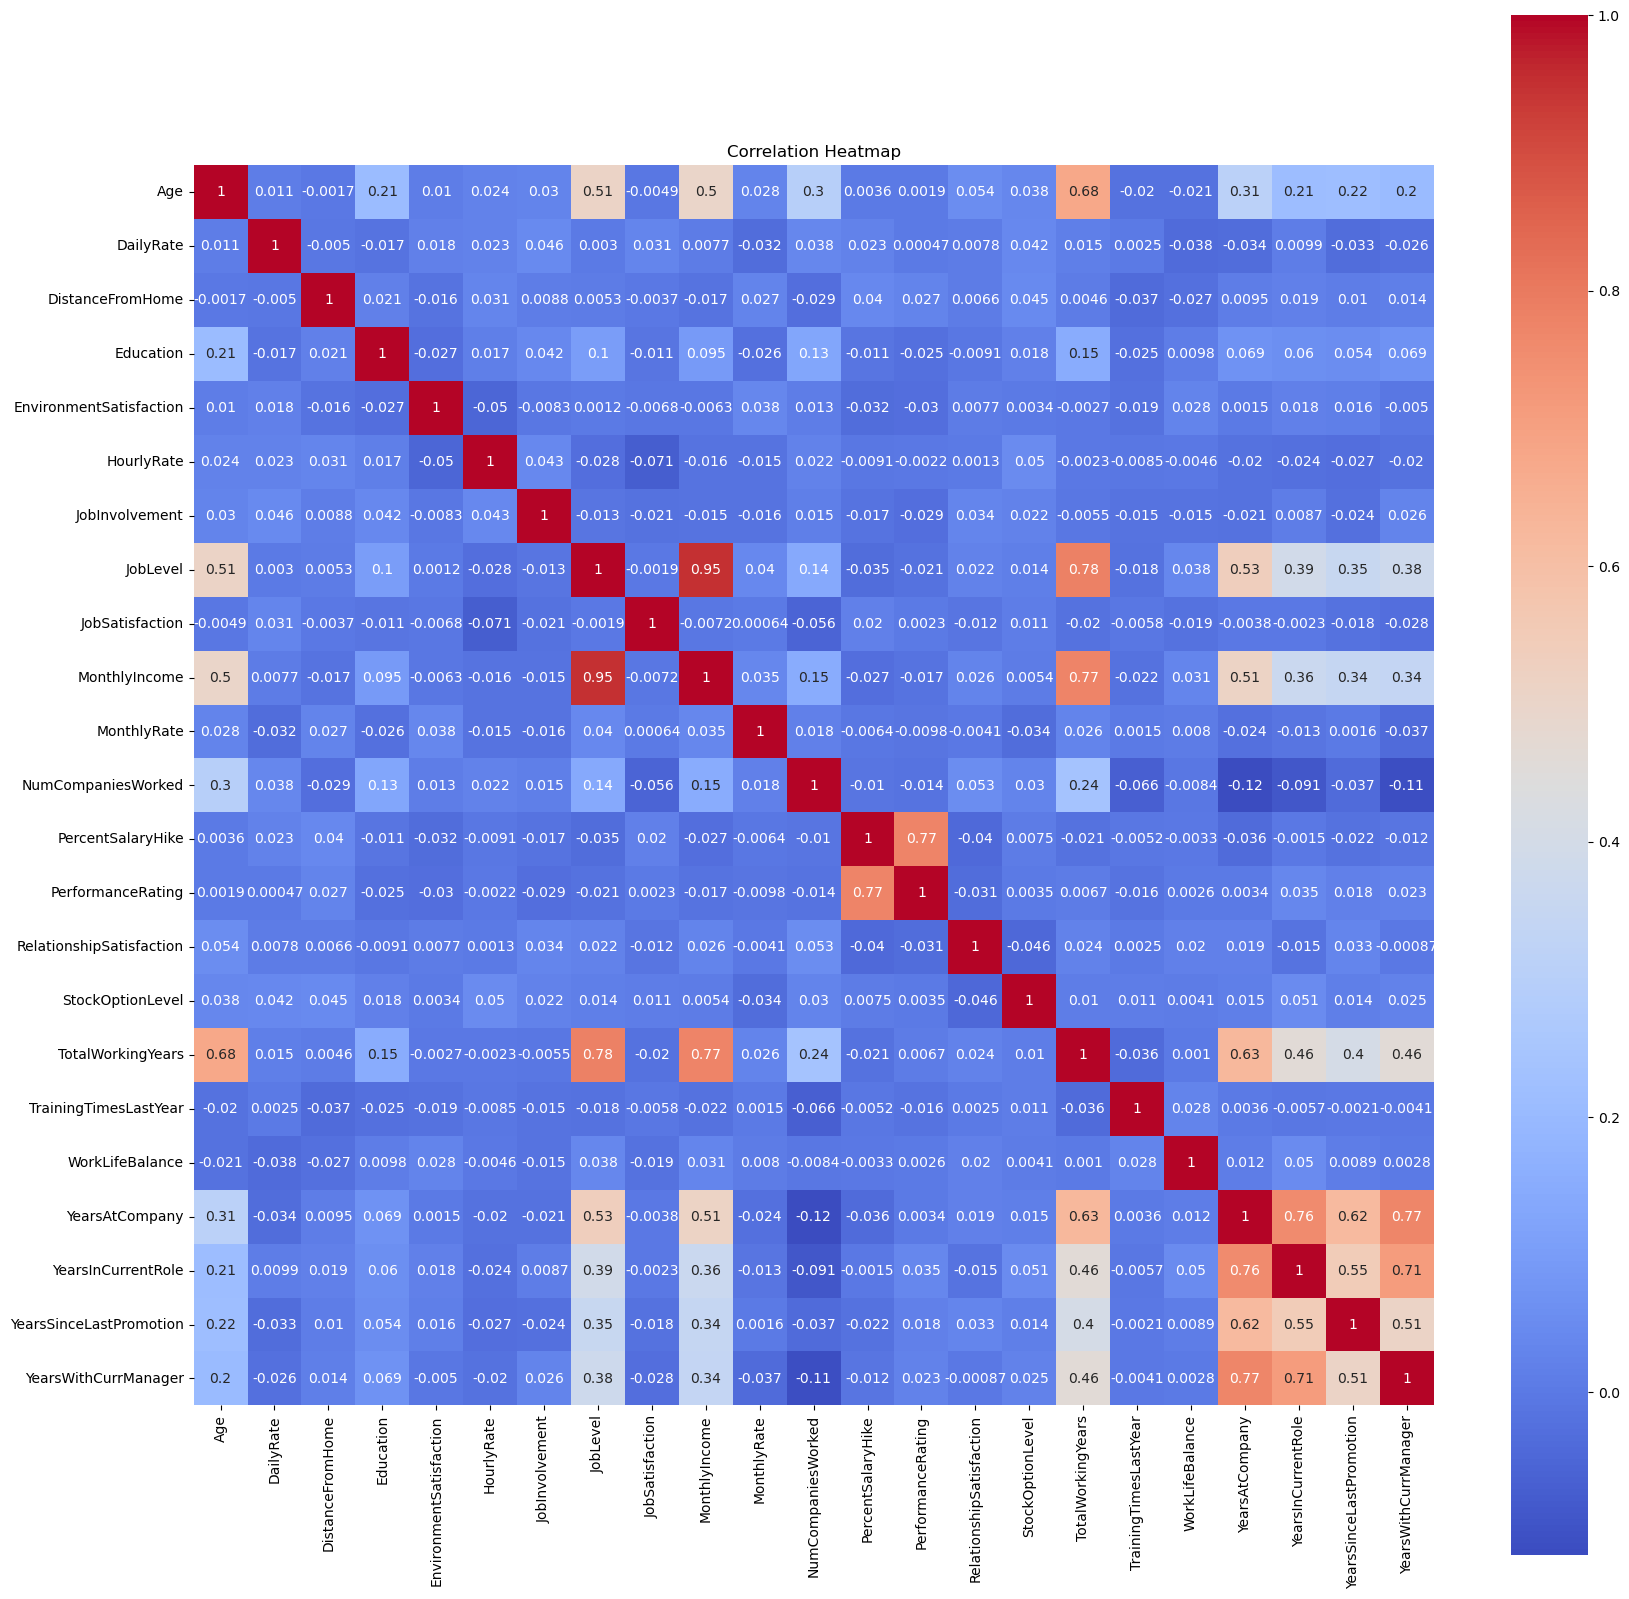

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# create a correlation matrix
corr_matrix = attrition_df.corr()

# create a heatmap using seaborn
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

From the correlation matrix we can determine 'Joblevel' and 'MonthlyIncome' columns have the positive correlation so, we can remove one variable. Here I am eleminating 'MonthlyIncome' column.
"YearsAtCompany" is highly corelated with the columns "YearsInCurrentRole" and "YearsWithCurrManger".

In [12]:
attrition_df = attrition_df.drop('MonthlyIncome', axis = 1)
#data = data.drop('YearsAtCompany', axis = 1)
shape = attrition_df.shape
print("Dataset shape: Row-", shape[0], "Column-", shape[1])

Dataset shape: Row- 1470 Column- 30


**3.1 Histogram**

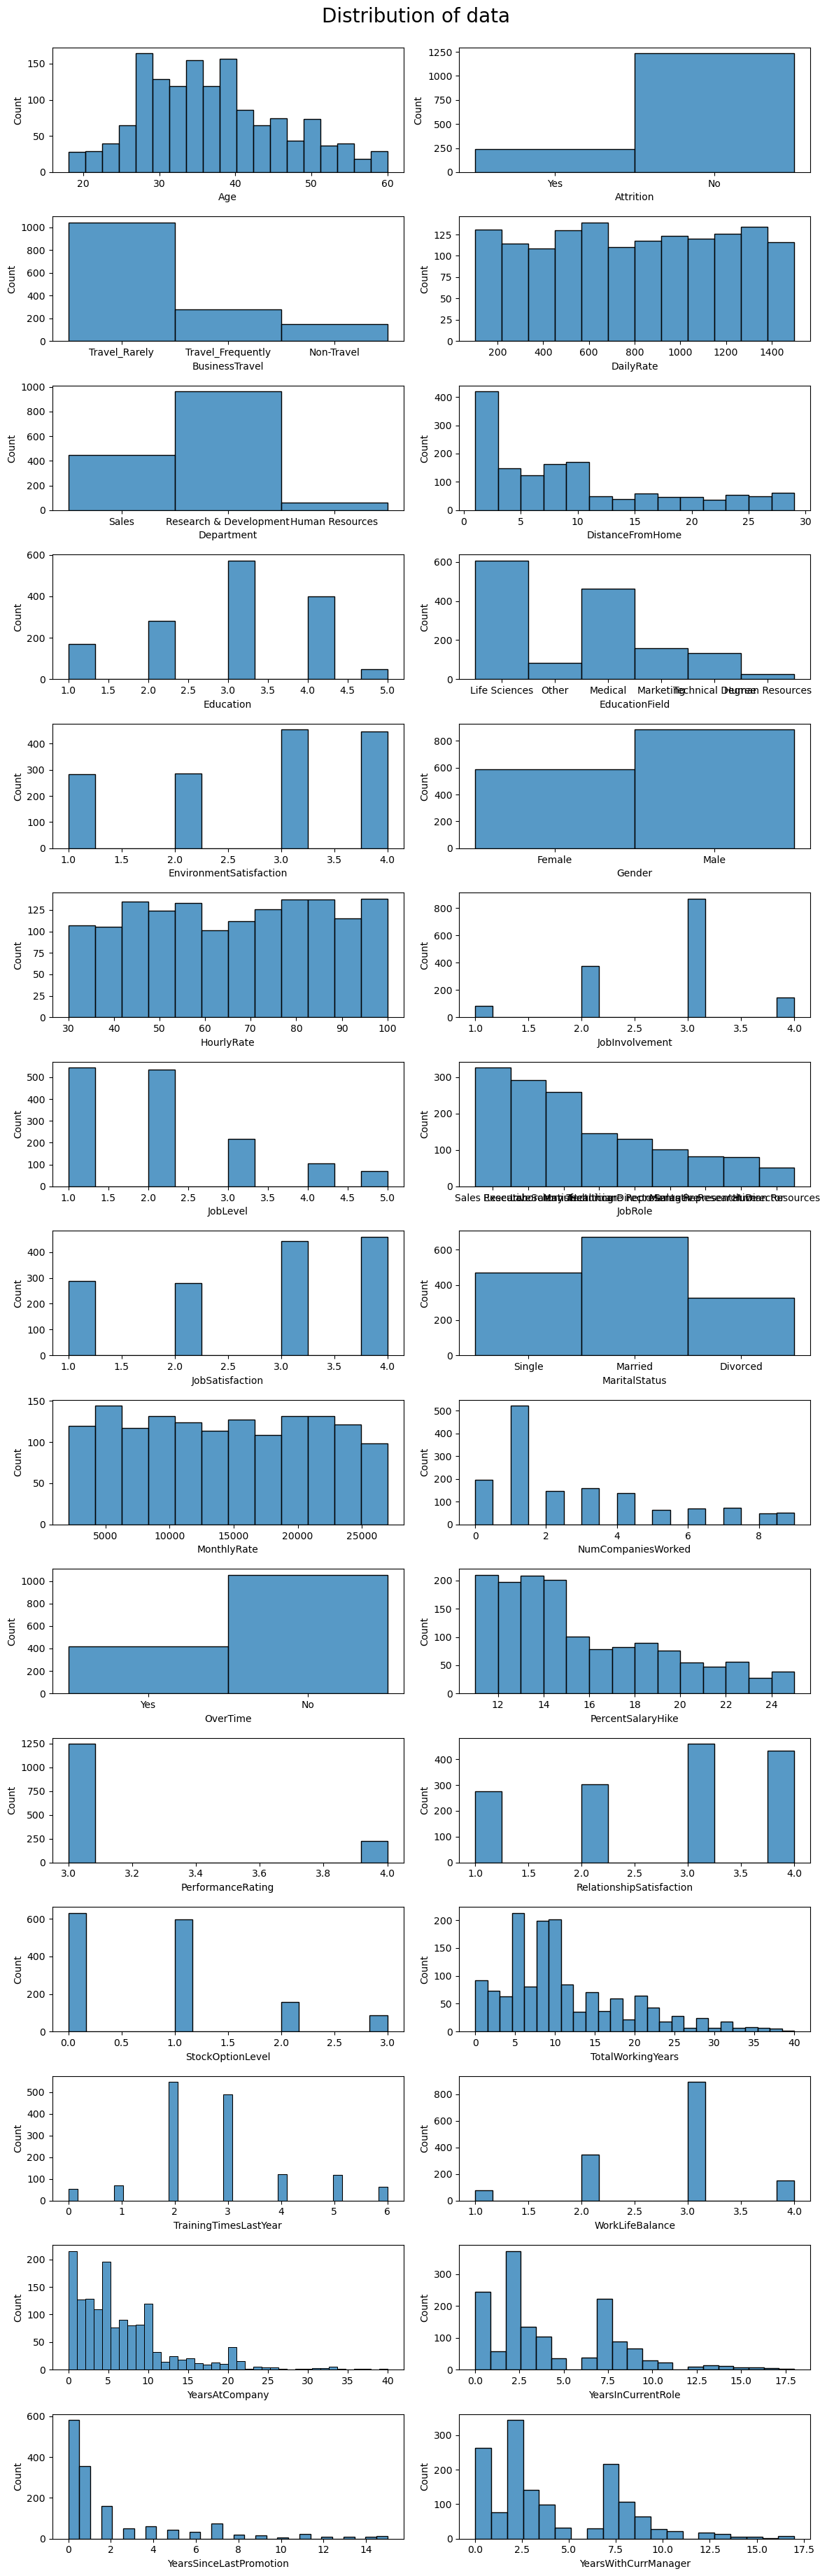

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ncols = 2
nrows = np.ceil(len(attrition_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(attrition_df.columns, axs.flatten()):
    sns.histplot(attrition_df, x=c, ax=ax)
fig.suptitle('Distribution of data', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

**Box Plot**

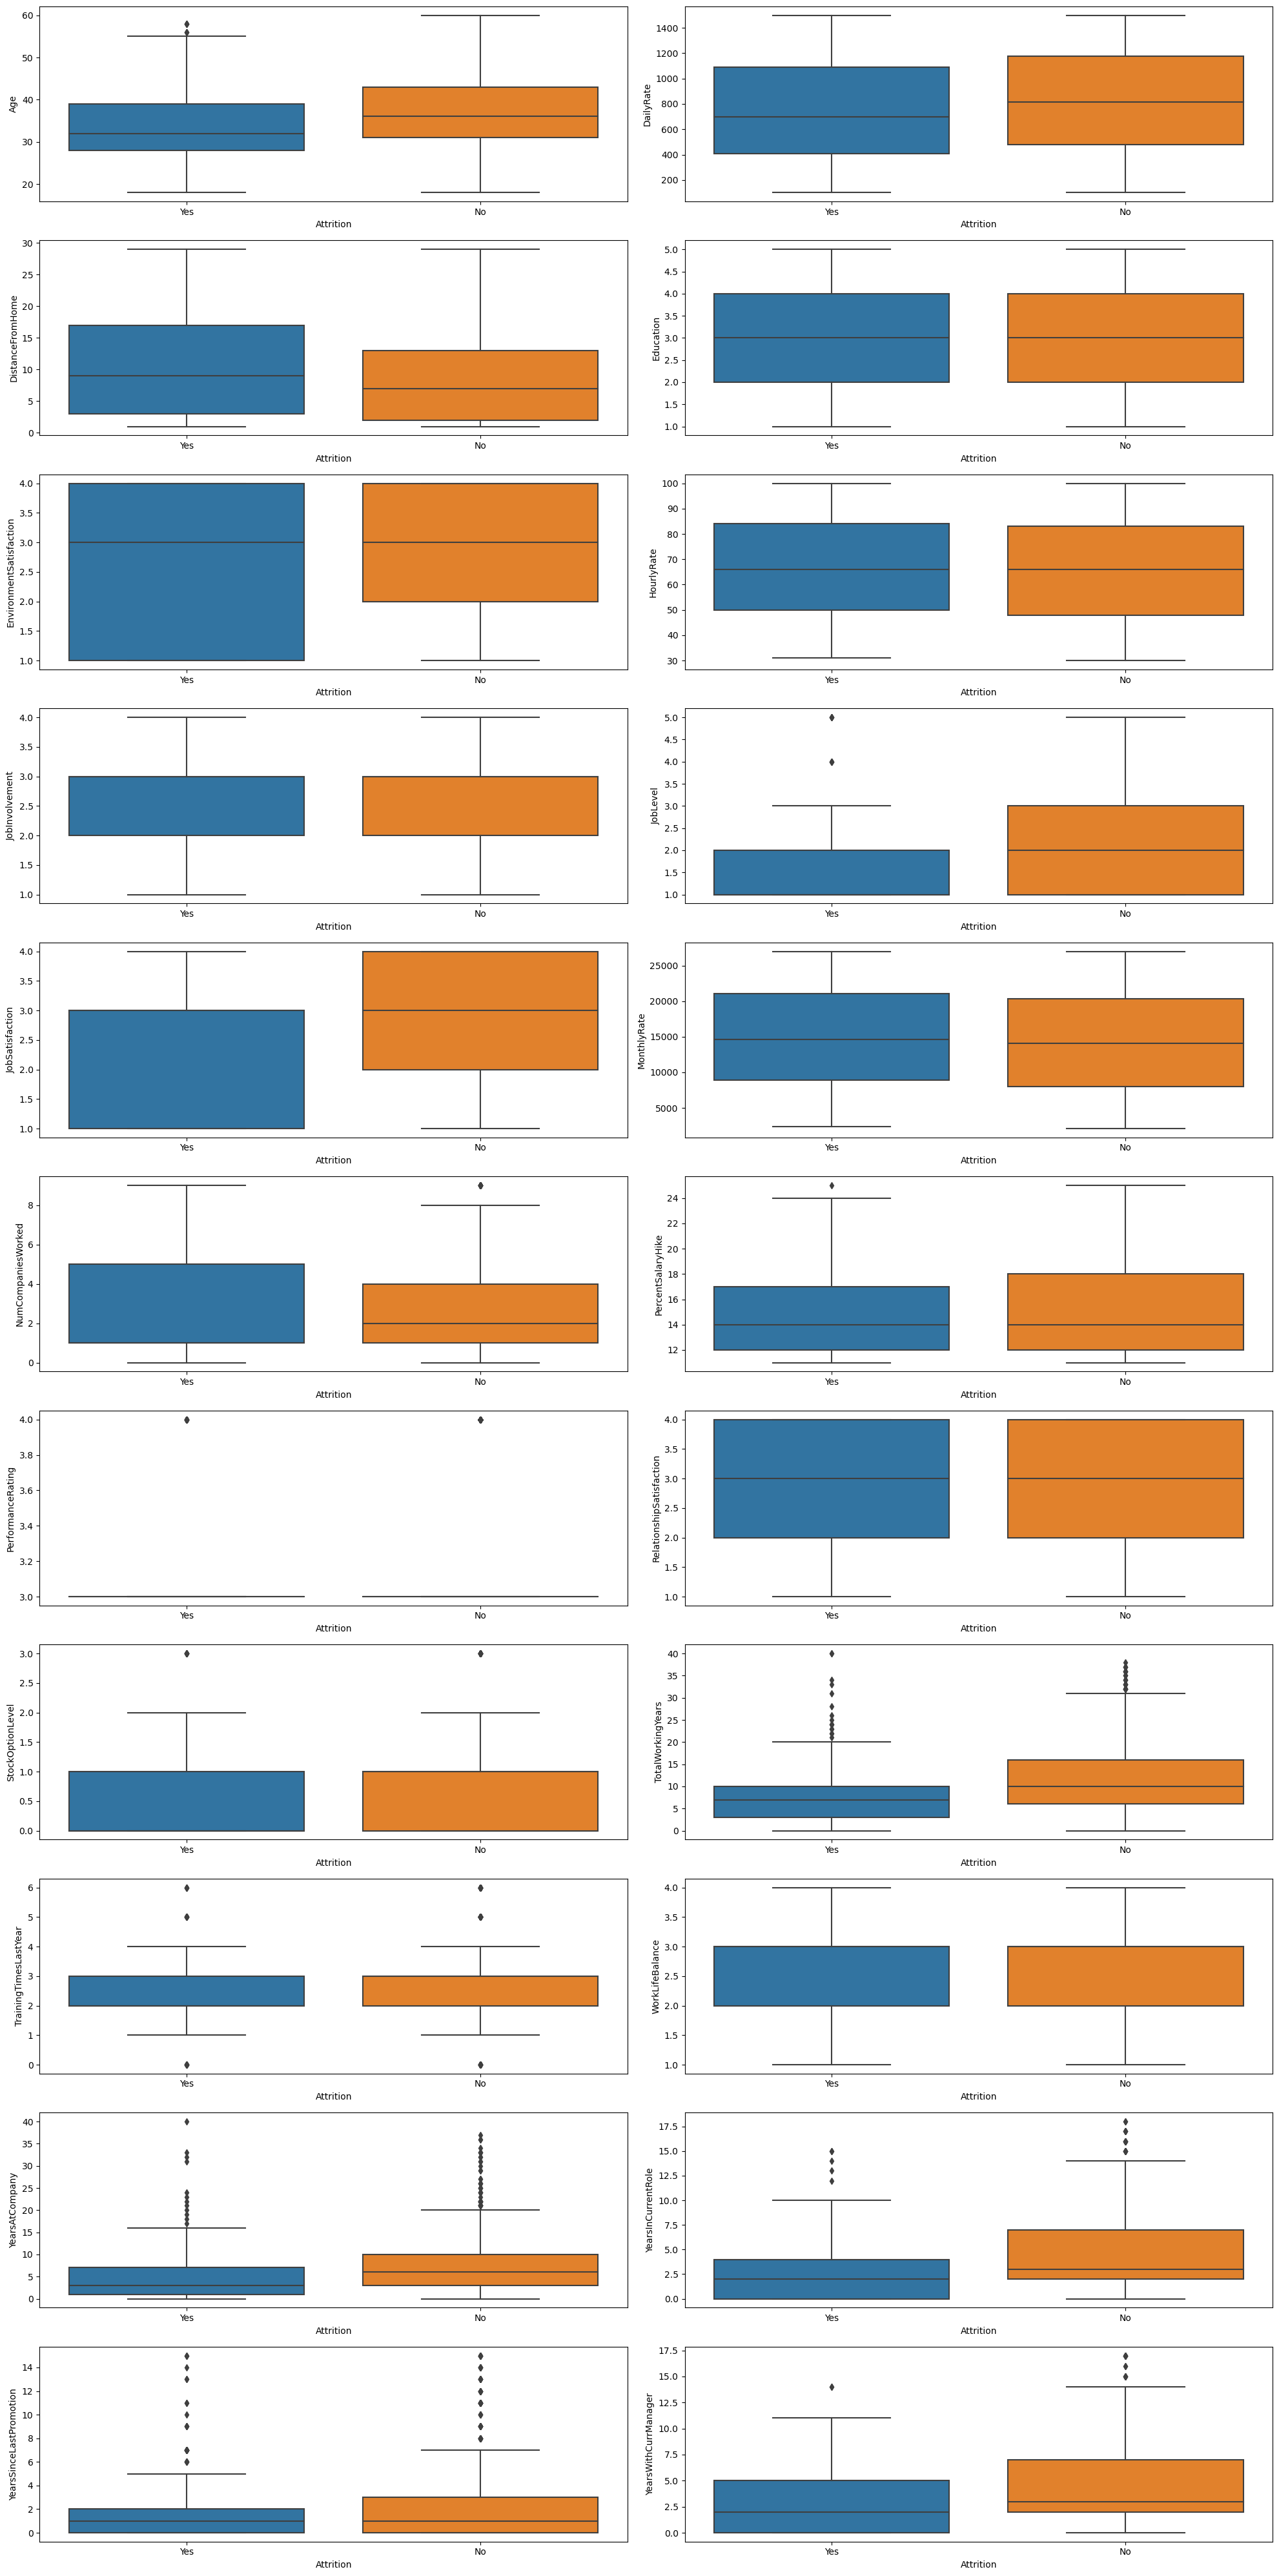

In [14]:
# Create a box plot for each numerical column
# Create side-by-side boxplots for each numerical column
numerical_columns = attrition_df.select_dtypes(include='int64').columns
import math
fig, axs = plt.subplots(ncols=2, nrows=math.ceil(len(numerical_columns)/2), figsize=(20, 40))
axs = axs.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(x="Attrition", y=col, data=attrition_df, ax=axs[i])
plt.tight_layout()

**Remove the Outliers**

In [15]:
# Compute the IQR
Q1 = attrition_df['Age'].quantile(0.25)
Q3 = attrition_df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)
outlier_indices = np.where((attrition_df['Age'] < lower_bound) | (attrition_df['Age'] > upper_bound))
# Remove the outliers
attrition_df = attrition_df.drop(outlier_indices[0], axis=0)

In [16]:
scikit_attrition_df = attrition_df
pycart_attrition_df = attrition_df
pycart_attrition_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## Data Transform-

**Convert Categorical columns into numerical.**

In [17]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to categorical columns
cat_cols = scikit_attrition_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    scikit_attrition_df[col] = le.fit_transform(scikit_attrition_df[col])

**Apply scalling in the numerical columns.**

In [18]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
numerical_cols = scikit_attrition_df.select_dtypes(include=['int64']).columns

# Scale the numerical columns
scaler = StandardScaler()
scikit_attrition_df[numerical_cols] = scaler.fit_transform(scikit_attrition_df[numerical_cols])

In [19]:
pd.set_option('display.max_columns', None)
scikit_attrition_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,1,2,0.742527,2,-1.010909,-0.891688,1,-0.660531,0,1.383138,0.379672,-0.057788,7,1.153254,2,0.726020,2.125136,1,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,0,1,-1.297775,1,-0.147150,-1.868426,1,0.254625,1,-0.240677,-1.026167,-0.057788,6,-0.660853,1,1.488876,-0.678049,0,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,1,2,1.414363,1,-0.887515,-0.891688,4,1.169781,1,1.284725,-1.026167,-0.961486,2,0.246200,2,-1.674841,1.324226,1,-0.057267,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,0,1,1.461466,1,-0.764121,1.061787,1,1.169781,0,-0.486709,0.379672,-0.961486,6,0.246200,1,1.243211,-0.678049,1,-1.150554,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0,2,-0.524295,1,-0.887515,-1.868426,3,-1.575686,1,-1.274014,0.379672,-0.961486,2,-0.660853,1,0.325900,2.525591,0,-0.877232,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


## Model Bulding

In [20]:
# split into X and y
from sklearn.model_selection import train_test_split

X = scikit_attrition_df.drop('Attrition', axis=1)
y = scikit_attrition_df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
# model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate

# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

**Perform the Model**

Model name : Logistic Regression

Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 50, 'C': 1.25}
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       370
           1       0.72      0.32      0.45        71

    accuracy                           0.87       441
   macro avg       0.80      0.65      0.69       441
weighted avg       0.86      0.87      0.85       441



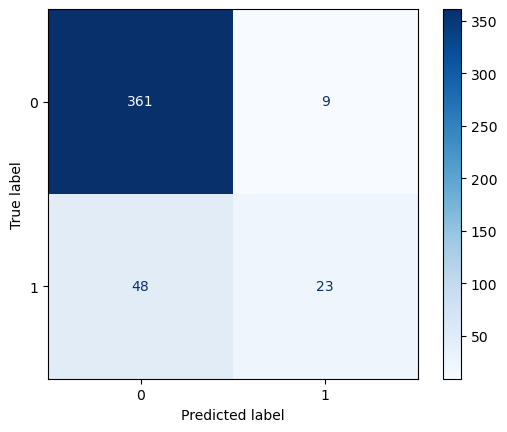

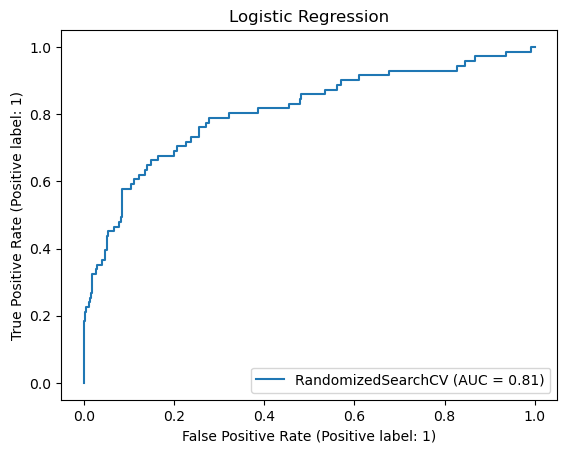

Model name : SVM

Best parameters: {'kernel': 'linear', 'gamma': 'auto', 'C': 0.25}
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       370
           1       0.81      0.30      0.43        71

    accuracy                           0.88       441
   macro avg       0.84      0.64      0.68       441
weighted avg       0.87      0.88      0.85       441



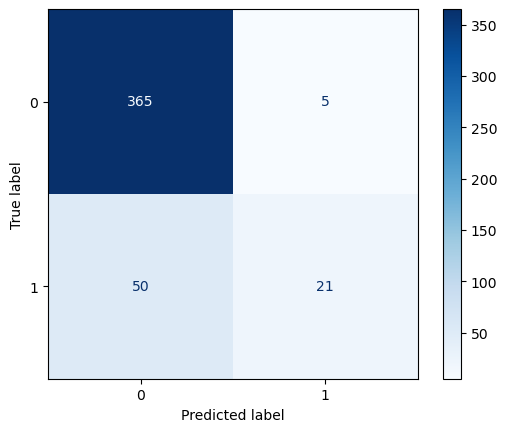

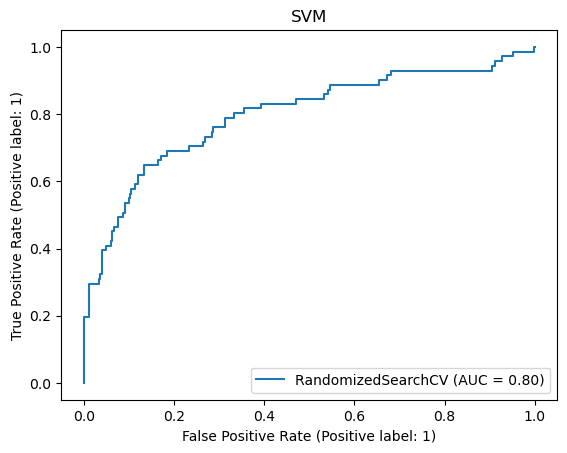

Model name : Random Forest

Best parameters: {'n_estimators': 300, 'max_depth': 10, 'criterion': 'gini'}
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       370
           1       0.45      0.13      0.20        71

    accuracy                           0.83       441
   macro avg       0.65      0.55      0.55       441
weighted avg       0.79      0.83      0.79       441



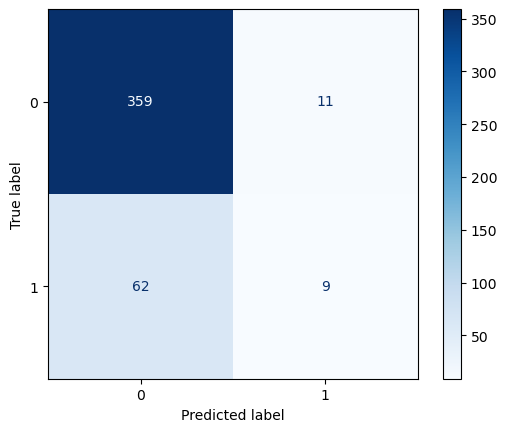

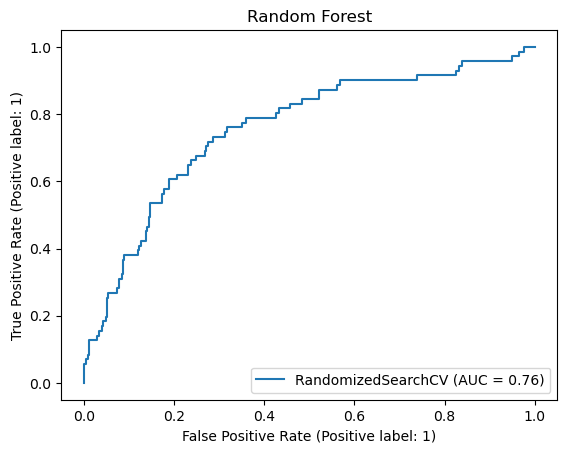

In [22]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

# Define the classifiers and their hyperparameter grids
classifiers = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=0),
        "hyperparameters": {
            "penalty": ["l2", "elasticnet"],
            "C": [0.25, 0.5, 0.75, 1, 1.25, 0.1],
            "max_iter": [50, 100, 150],
            "solver": ["lbfgs", "liblinear"]
        }
    },
    "SVM": {
        "model": SVC(random_state=0, probability=True),
        "hyperparameters": {
            "C": [0.25, 0.5, 0.75, 1, 1.25, 0.1],
            "kernel": ["linear", "rbf", "poly", "sigmoid"],
            "gamma": ["scale", "auto"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=0),
        "hyperparameters": {
            "n_estimators": [50, 100, 150, 200, 250, 300, 500],
            "max_depth": [4, 6, 8, 10, 12],
            "criterion": ["gini", "entropy"]
        }
    }
}

# Perform grid search on each classifier to find the best hyperparameters
best_parameters = {}
for model_name, model_data in classifiers.items():
    print(f"Model name : \033[1m{model_name}\033[0m\n")
    model = model_data["model"]
    hyperparameters = model_data["hyperparameters"]
    grid_search = RandomizedSearchCV(model, hyperparameters, scoring="roc_auc", n_iter=5, n_jobs=-1, random_state=0)
    grid_search.fit(X_train, y_train)
    best_parameters[model_name] = grid_search.best_params_
    print(f"Best parameters: {best_parameters[model_name]}")
    print(classification_report(y_test, grid_search.predict(X_test)))
    plot_confusion_matrix(grid_search, X_test, y_test, cmap="Blues")
    plot_roc_curve(grid_search, X_test, y_test)
    plt.title(model_name)
    plt.show()

## PyCaret

In [23]:
from pycaret.classification import *

In [24]:
# setup PyCaret
exp_reg = setup(data = pycart_attrition_df, 
                target = 'Attrition',
                categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender','JobRole', 'MaritalStatus', 'OverTime'],
                numeric_features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel','JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                                   'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                                   'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                                   'YearsSinceLastPromotion', 'YearsWithCurrManager'], 
                session_id = 123,
                normalize = True,  # scale numerical columns
                transformation=True)

,Description,Value
0,Session id,123
1,Target,Attrition
2,Target type,Binary
3,Original data shape,"(1470, 30)"
4,Transformed data shape,"(1470, 49)"
5,Transformed train set shape,"(1029, 49)"
6,Transformed test set shape,"(441, 49)"
7,Ordinal features,2
8,Numeric features,22
9,Categorical features,7


In [25]:
# Create a Linear Regression model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9029,0.8391,0.4375,0.8750,0.5833,0.5352,0.5765
1,0.8738,0.8621,0.3750,0.6667,0.4800,0.4145,0.4368
2,0.8932,0.8484,0.5000,0.7273,0.5926,0.5336,0.5460
3,0.8544,0.8488,0.2353,0.6667,0.3478,0.2864,0.3361
4,0.8738,0.7832,0.3529,0.7500,0.4800,0.4186,0.4573
5,0.8641,0.8208,0.2941,0.7143,0.4167,0.3545,0.3995
6,0.8738,0.8023,0.3529,0.7500,0.4800,0.4186,0.4573
7,0.8641,0.8256,0.4706,0.6154,0.5333,0.4554,0.4611
8,0.8252,0.6936,0.3529,0.4615,0.4000,0.2998,0.3035


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [26]:
# Create a Suport Vector model
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8738,0.0000,0.6250,0.5882,0.6061,0.5310,0.5313
1,0.8155,0.0000,0.5000,0.4211,0.4571,0.3470,0.3489
2,0.8350,0.0000,0.3750,0.4615,0.4138,0.3189,0.3213
3,0.7767,0.0000,0.1176,0.2000,0.1481,0.0295,0.0309
4,0.7961,0.0000,0.2941,0.3571,0.3226,0.2039,0.2052
5,0.8641,0.0000,0.4706,0.6154,0.5333,0.4554,0.4611
6,0.8252,0.0000,0.4118,0.4667,0.4375,0.3345,0.3354
7,0.8544,0.0000,0.4118,0.5833,0.4828,0.4009,0.4092
8,0.8155,0.0000,0.4118,0.4375,0.4242,0.3145,0.3147


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [27]:
# Create a Random Forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8641,0.7798,0.1250,1.0000,0.2222,0.1944,0.3281
1,0.8544,0.8182,0.0625,1.0000,0.1176,0.1012,0.2309
2,0.8544,0.7101,0.1250,0.6667,0.2105,0.1698,0.2445
3,0.8350,0.8071,0.1176,0.5000,0.1905,0.1362,0.1814
4,0.8447,0.7897,0.0588,1.0000,0.1111,0.0945,0.2227
5,0.8641,0.8639,0.1765,1.0000,0.3000,0.2635,0.3896
6,0.8544,0.7695,0.1765,0.7500,0.2857,0.2378,0.3167
7,0.8350,0.7527,0.0588,0.5000,0.1053,0.0731,0.1270
8,0.8544,0.7770,0.1176,1.0000,0.2105,0.1821,0.3165


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [28]:
# Compare the performance of different models
best_model = compare_models(include=['lr', 'svm', 'rf'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8708,0.8205,0.3871,0.6893,0.4885,0.4221,0.4486,1.0290
rf,Random Forest Classifier,0.8494,0.7813,0.1018,0.7417,0.1753,0.1434,0.2314,1.9030
svm,SVM - Linear Kernel,0.8299,0.0000,0.4180,0.4631,0.4355,0.3371,0.3395,1.3210


Processing:   0%|          | 0/17 [00:00<?, ?it/s]